In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [5]:
import sys
sys.path.append("../../../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Database Design'
data = make_dir_line(modality, project)

raw = data('raw')
processed = data('processed')
external = data('external')

In [6]:
import sqlite3

conn = sqlite3.connect(external / 'database.sqlite')
cur = conn.cursor()

In [7]:
import sqlite3

def eliminar_vista(nombre_vista):
    try:

        # Consulta para eliminar la vista
        consulta = f"DROP VIEW IF EXISTS {nombre_vista};"

        # Ejecutar la consulta
        cur.execute(consulta)

        # Confirmar los cambios
        conn.commit()

        print(f"Vista '{nombre_vista}' eliminada correctamente.")

    except sqlite3.Error as error:
        print(f"Error al eliminar la vista: {error}")

# 7.4.0_Database Management

## 7.4.2 Create a role

In [8]:
# # -- Create a data scientist role
# cur.execute("""
            
#             CREATE ROLE data_scientist;

#             """).fetchall()

In [9]:
# # -- Create a role for Marta
# cur.execute("""
            
#             CREATE ROLE marta LOGIN;

#             """).fetchall()

In [10]:
# # -- Create an admin role
# cur.execute("""
            
#             CREATE ROLE admin WITH CREATEDB CREATEROLE;

#             """).fetchall()

## 7.4.3 GRANT privileges and ALTER attributes

In [11]:
# # -- Grant data_scientist update and insert privileges
# cur.execute("""
            
#             GRANT UPDATE, INSERT ON long_reviews TO data_scientist;

#             """).fetchall()

In [12]:
# # -- Give Marta's role a password
# cur.execute("""
            
#             ALTER ROLE marta WITH PASSWORD 's3cur3p@ssw0rd';

#             """).fetchall()

## 7.4.4 Add a user role to a group role

In [13]:
# -- Add Marta to the data scientist group
# cur.execute("""
            
#             GRANT data_scientist TO marta;

#             """).fetchall()

In [14]:
# -- Remove Marta from the data scientist group
# cur.execute("""
            
#             REVOKE data_scientist FROM marta;

#             """).fetchall()

## 7.4.6 Reasons to partition

In the video, you saw some very good reasons to use partitioning. However, can you find which one wouldn't be a good reason to use partitioning?

R:/ Improve data integrity, 

## 7.4.7 Partitioning and normalization

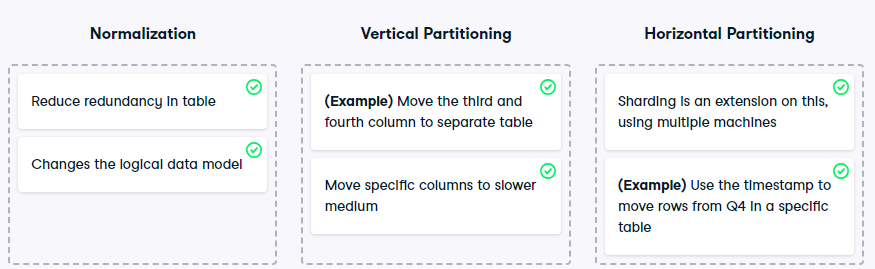

## 7.4.8 Creating vertical partitions

In [20]:
conn = sqlite3.connect(processed / 'films.db')
cur = conn.cursor()

In [ ]:
# -- Create a new table called film_descriptions
# cur.execute("""
            
#             CREATE TABLE film_descriptions(
#                 film_id INT,
#                 long_description TEXT
#             );

#             """).fetchall()

In [ ]:
# # -- Copy the descriptions from the film table
# cur.execute("""
            
#             INSERT INTO film_descriptions
#             SELECT film_id, long_description FROM film;

#             """).fetchall()

In [22]:
# # -- Drop the column in the original table
cur.execute("""
            
            ALTER TABLE film 
            DROP COLUMN long_description;

            """).fetchall()

[]

In [24]:
# -- Join to create the original table
cur.execute("""
            
            SELECT * 
            FROM film 
            JOIN film_descriptions USING(film_id);

            """).fetchall()

[(1, 'ACADEMY DINOSAUR', 6, 0.99, 86, 20.99, 'PG', '2019', 'ACADEMY DINOSAUR'),
 (2, 'ACE GOLDFINGER', 3, 4.99, 48, 12.99, 'G', '2017', 'ACE GOLDFINGER'),
 (3,
  'ADAPTATION HOLES',
  7,
  2.99,
  50,
  18.99,
  'NC-17',
  '2019',
  'ADAPTATION HOLES'),
 (4, 'AFFAIR PREJUDICE', 5, 2.99, 117, 26.99, 'G', '2017', 'AFFAIR PREJUDICE'),
 (5, 'AFRICAN EGG', 6, 2.99, 130, 22.99, 'G', '2017', 'AFRICAN EGG'),
 (6, 'AGENT TRUMAN', 3, 2.99, 169, 17.99, 'PG', '2018', 'AGENT TRUMAN'),
 (7,
  'AIRPLANE SIERRA',
  6,
  4.99,
  62,
  28.99,
  'PG-13',
  '2017',
  'AIRPLANE SIERRA'),
 (8, 'AIRPORT POLLOCK', 6, 4.99, 54, 15.99, 'R', '2018', 'AIRPORT POLLOCK'),
 (9, 'ALABAMA DEVIL', 3, 2.99, 114, 21.99, 'PG-13', '2019', 'ALABAMA DEVIL'),
 (10,
  'ALADDIN CALENDAR',
  6,
  4.99,
  63,
  24.99,
  'NC-17',
  '2017',
  'ALADDIN CALENDAR'),
 (11, 'ALAMO VIDEOTAPE', 6, 0.99, 126, 16.99, 'G', '2018', 'ALAMO VIDEOTAPE'),
 (12, 'ALASKA PHANTOM', 6, 0.99, 136, 22.99, 'PG', '2018', 'ALASKA PHANTOM'),
 (13, 'ALI FOR

## 7.4.9 Creating horizontal partitions

In [ ]:
# # -- Create a new table called film_partitioned
# cur.execute("""
            
#             CREATE TABLE film_partitioned (
#             film_id INT,
#             title TEXT NOT NULL,
#             release_year TEXT
#             )
#             PARTITION BY RANGE (release_year);

#             """).fetchall()

In [ ]:
# # -- Create the partitions for 2019, 2018, and 2017
# cur.execute("""
            
#             CREATE TABLE film_2019
#                 PARTITION OF film_partitioned FOR VALUES IN ('2019');

#             """).fetchall()

In [ ]:
# cur.execute("""
            
#             CREATE TABLE film_2018
#                 PARTITION OF film_partitioned FOR VALUES IN ('2018');

#             """).fetchall()

In [ ]:
# cur.execute("""
            
#             CREATE TABLE film_2017
#                 PARTITION OF film_partitioned FOR VALUES IN ('2017');

#             """).fetchall()

In [ ]:
# # -- Insert the data into film_partitioned
# cur.execute("""
            
#             CREATE TABLE film_2017
#                 PARTITION OF film_partitioned FOR VALUES IN ('2017');

#             """).fetchall()

In [ ]:
# -- View film_partitioned
# cur.execute("""
            
#             SELECT * FROM film_partitioned;

#             """).fetchall()

## 7.4.10 Data integration do's and dont's

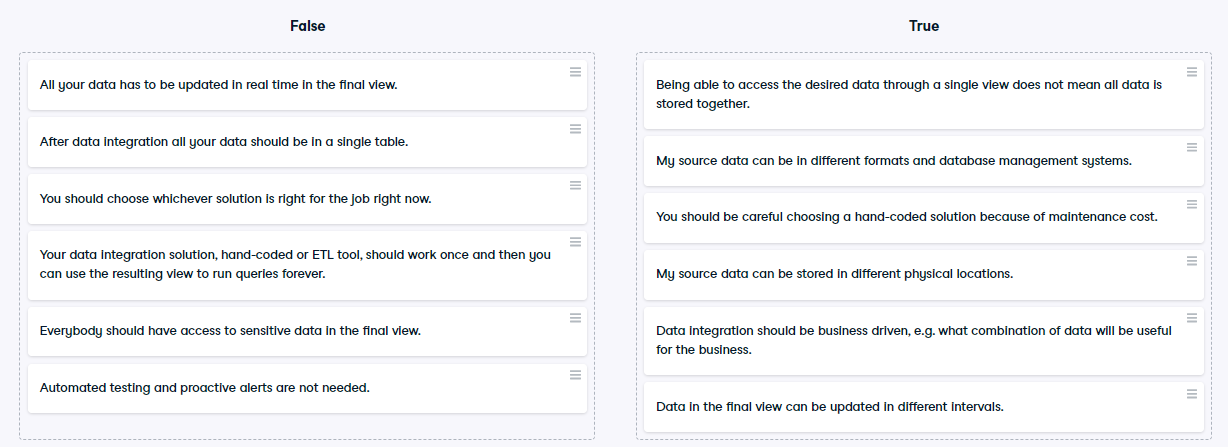

## 7.4.11 Analyzing a data integration plan

You're a data analyst in a hospital that wants to make sure there is enough cough medicine should an epidemic break out. For this, you need to combine the historical health records with the upcoming appointments to see if you can detect a pattern similar to the last cold epidemic. Then, you need to make sure there is sufficient stock available or if the stock should be increased. To help tackle this problem, you created a data integration plan.

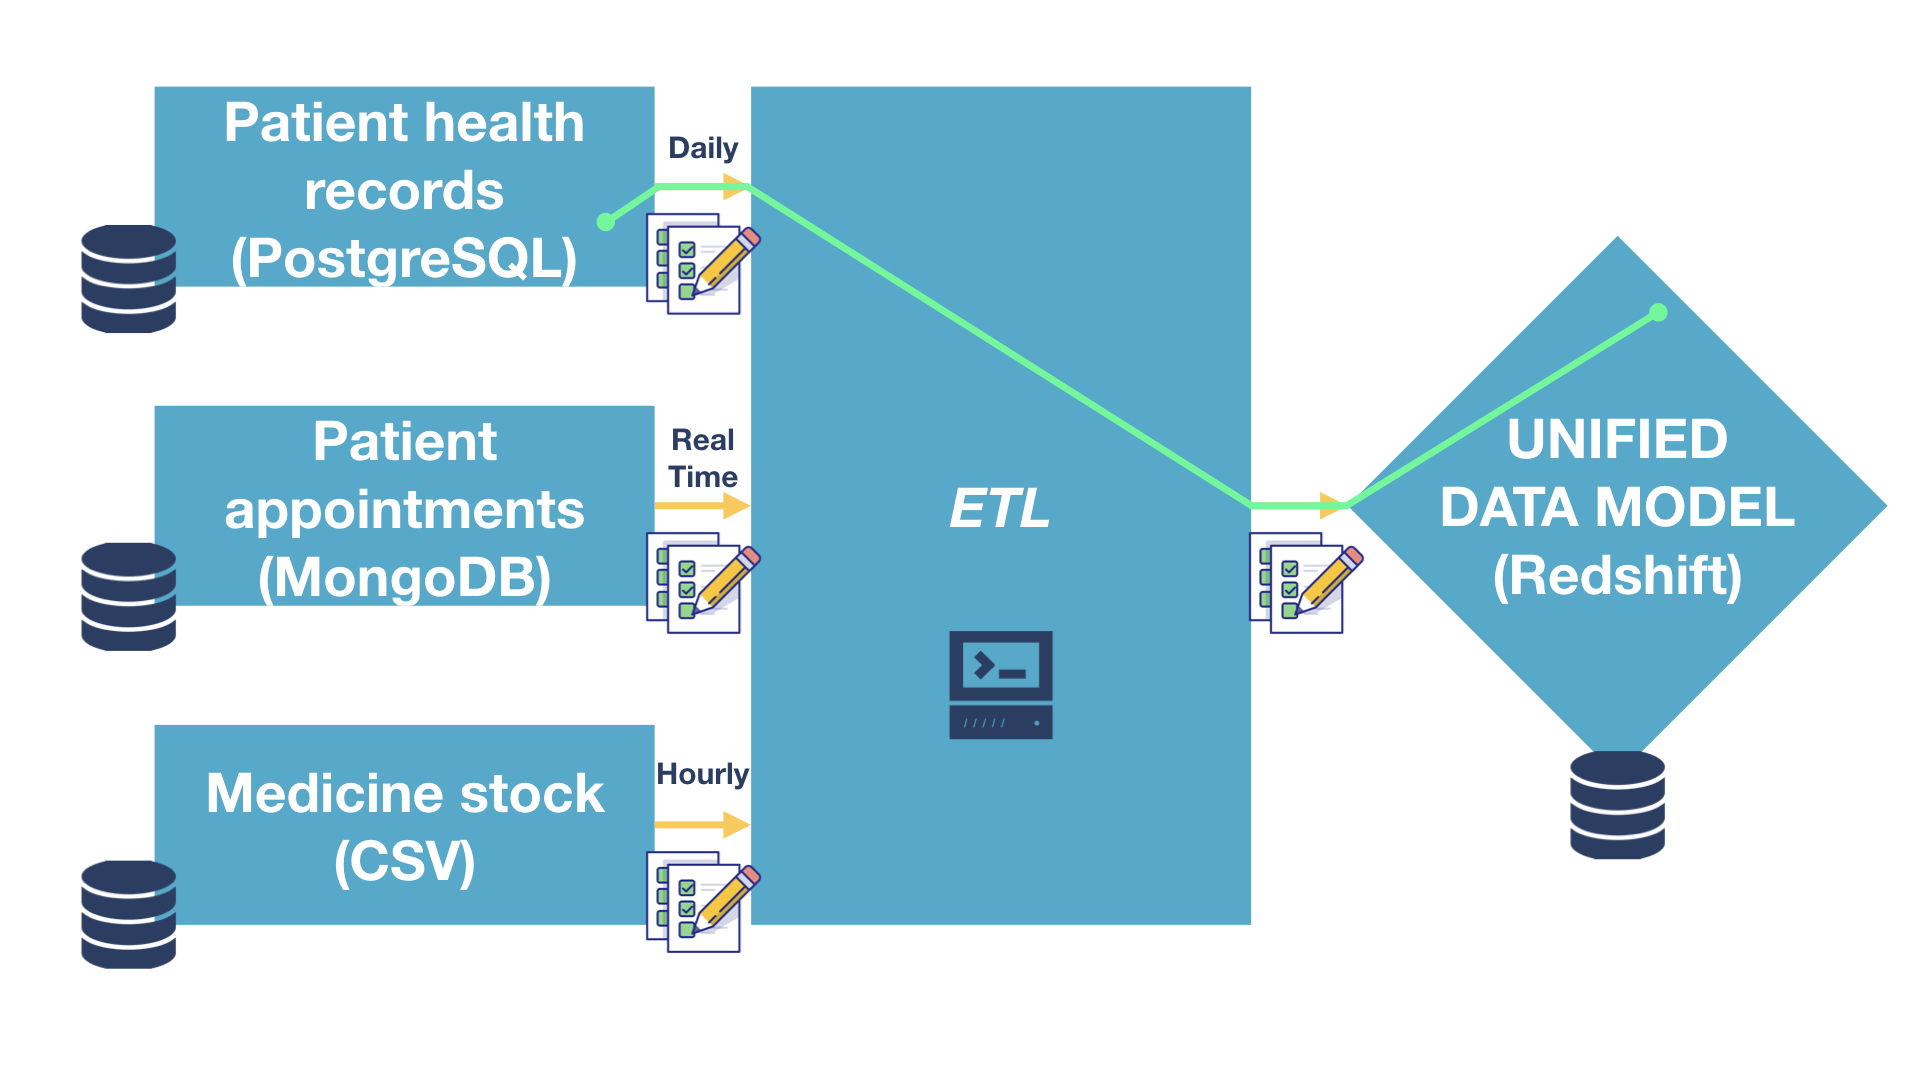

Which risk is not clearly indicated on the data integration plan?

R:/ You should indicate that you plan to anonymize patient health records. When working with sensitive data it is important to think about permissions. By default you should have the same access rights before and after data integration. If part of the data is essential, it should be anonymized, in this case you can keep the illnesses but remove identifying information.

## 7.4.11 SQL versus NoSQL

When is it better to use a SQL DBMS?

R:/ You are concerned about data consistency and 100% data integrity is your top goal. The strength of SQL DBMSs lies in using integrity constraints to maintain data consistency across multiple tables.

## 7.4.12 Choosing the right DBMS

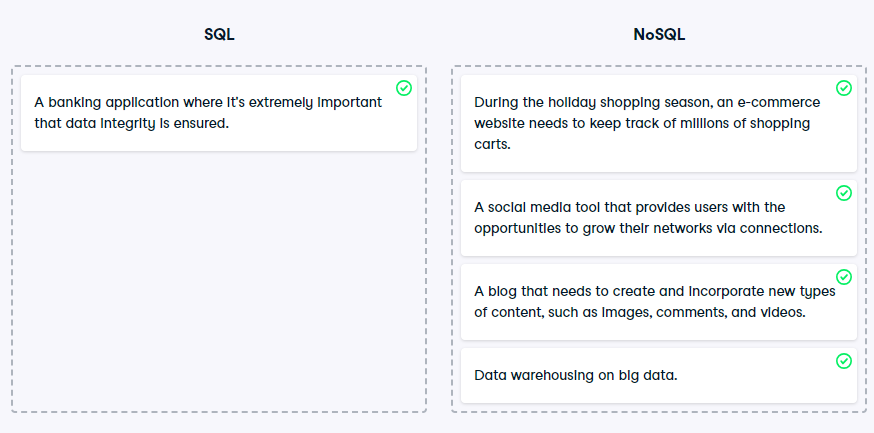

In [25]:
print('Ok_')

Ok_
